In [1]:
import pickle
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt

In [2]:
file_names = ["doctor-entropy", "nurse-entropy"]
labels = ["Doctor", "Nurse"]
colors = ["dodgerblue", "orangered"] # does not need to match the previous two

all_data = []

for name in file_names:
    file = f"/content/drive/MyDrive/yearly-bias/results/{name}.pkl"
    with open(file, "rb") as f:
        all_data.append(pickle.load(f))

In [3]:
with open("/content/drive/MyDrive/yearly-bias/ALL.txt", "r") as f:
    all_numbers = []
    for line in f:
        all_numbers.append(int(line.split('-')[1].split('.')[0]))

all_numbers = sorted(all_numbers)

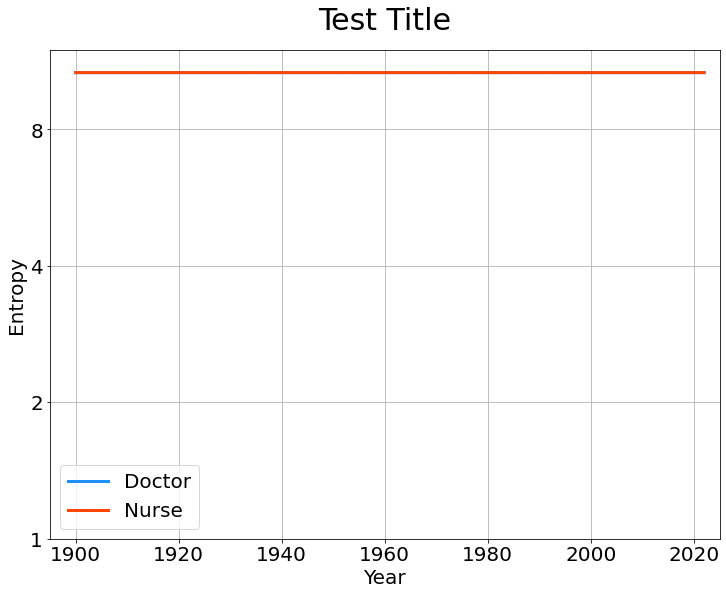

In [4]:
fig, ax = plt.subplots(figsize=(12,9))

lines = []

for i, (name, label) in enumerate(zip(file_names, labels)):
    lines.append(ax.plot([], [], linewidth=3, label=label, color=colors[i])[0])

ax.set_xlim(1895, 2025)
ax.set_yscale('log')

x = list(range(1900, 2023))

# some undesired labels will appear if this is not set
ax.minorticks_off()

ax.set_ylim(1, 12)
ax.set_yticks([1,2,4,8])
ax.set_yticklabels([1,2,4,8], fontsize=20)
ax.set_ylabel("Entropy", fontsize=20)

# ax.set_ylim(0.5, 20)
# ax.set_yticks([1,2,5,10])
# ax.set_yticklabels([1,2,5,10], fontsize=20)
# ax.set_ylabel("Ratio of Male/Female", fontsize=20)


ax.set_xticks(list(range(1900, 2023, 20)))
ax.set_xticklabels(list(range(1900, 2023, 20)), fontsize=20)
ax.set_xlabel("Year", fontsize=20)


for line, data in zip(lines, all_data):
    line.set_data(x, data[0])

ax.set_title("Test Title", fontsize=30, pad=20)


ax.grid()
ax.legend(fontsize=20, loc='lower left')

plt.show()

In [5]:
def animate(frame, ax, lines, data):
    steps = data[1]

    x = list(range(1900, 2023))

    # remember to change the format here!
    ax.set_title(f"Doctor & Nurse (Step {str(steps[frame]).rjust(7, '0')})", fontsize=30, pad=20)

    for line, data in zip(lines, data[0]):
        line.set_data(x, data[frame])

In [6]:
animation = FuncAnimation(fig, animate, fargs=(ax, lines, [all_data, all_numbers]), frames=62, interval=150)

In [7]:
video = animation.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.close()